# Description
## Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## Data Dictionary

- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer 
- CreditScore: It defines the credit history of the customer.  
- Geography: A customer’s location    
- Gender: It defines the Gender of the customer   
- Age: Age of the customer     
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary 
- isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

## Import necessary Libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set_theme()

# to scale the data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# To get diferent metric scores
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    auc,
    roc_auc_score,
    roc_curve,
)
from sklearn.decomposition import PCA

# importing tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

import warnings

warnings.filterwarnings("ignore")

# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Reading Dataset and Feature Elimination
- Read the dataset properly - Print the overview of the data (statistical summary, shape, info, etc) - Eliminate the unique features from the dataset with proper reasoning

In [2]:
# Load the Dataset
df = pd.read_csv("bank.csv")

<IPython.core.display.Javascript object>

### View sample of the Dataset

In [3]:
np.random.seed(2)  # To get the same random results every time
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7878,7879,15760456,Eberechukwu,731,France,Female,38,10,123711.73,2,1,0,171340.68,1
3224,3225,15713463,Tate,645,Germany,Female,41,2,138881.04,1,1,0,129936.53,1
1919,1920,15739858,Otitodilichukwu,618,France,Male,56,7,0.00,1,1,1,142400.27,1
4432,4433,15751193,Nnaemeka,621,Spain,Male,33,4,0.00,2,1,1,40299.23,0
4835,4836,15590623,Kovalyov,561,Spain,Male,34,4,85141.79,2,1,1,29217.37,0
4895,4896,15589435,Davide,784,France,Male,31,7,0.00,2,1,1,143204.41,0
7269,7270,15675926,Ardis,655,Germany,Male,34,7,118028.35,1,1,0,51226.32,1
1451,1452,15684198,McDonald,551,France,Female,38,10,0.00,2,1,1,216.27,0
1742,1743,15578603,Alexeieva,584,Germany,Female,54,1,77354.37,1,0,0,138192.98,1
4628,4629,15788151,Moore,650,Spain,Male,32,1,132187.73,2,1,1,178331.36,0


<IPython.core.display.Javascript object>

### Explore the Dataset

In [4]:
# checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 10000 rows and 14 columns.


<IPython.core.display.Javascript object>

- `RowNumber`, `CustomerId`, and `Surname` should be droped.

In [5]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

- All variables are Numeric except for the `Surname`, `Geography`, and `Gender`. 
- `Balance` and `EstimatedSalary` are Float variables and the rest of the variables are Integers.
- `HasCrCard`, `IsActiveMember`, and `Exited` are boolean Variables with values 0 or 1.
- No missing values are found.

In [6]:
# check for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

### dropping unwanted attributes
- Variables which don't add value.
- we don't need to compare them with something so they are not needed in this analysis.

In [7]:
# dropping `RowNumber`, `CustomerId`, and `Surname`
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 10000 rows and 11 columns.


<IPython.core.display.Javascript object>

### Summary of the Dataset

In [8]:
# view the statistical summary of all the columns in the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000,NaN,NaN,NaN,650.529,96.6533,350,584,652,718,850
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000,NaN,NaN,NaN,38.9218,10.4878,18,32,37,44,92
Tenure,10000,NaN,NaN,NaN,5.0128,2.89217,0,3,5,7,10
Balance,10000,NaN,NaN,NaN,76485.9,62397.4,0,0,97198.5,127644,250898
NumOfProducts,10000,NaN,NaN,NaN,1.5302,0.581654,1,1,1,2,4
HasCrCard,10000,NaN,NaN,NaN,0.7055,0.45584,0,0,1,1,1
IsActiveMember,10000,NaN,NaN,NaN,0.5151,0.499797,0,0,1,1,1
EstimatedSalary,10000,NaN,NaN,NaN,100090,57510.5,11.58,51002.1,100194,149388,199992


<IPython.core.display.Javascript object>

#### Observations:
- France is the Top value from the 3 Unique values of `Geography`.
- Males are more than the females in the Dataset, with frequency 5457. 
- `CreditScore` and `Tenure`, and `EstimatedSalary` have approximately same mean and median.
- Mean are greater than the median for `Age`, `NumOfProducts` and the 3 boolean variables, which suggests that those variables are right skewed.
- `Age` ranges from 18 up to 92. 
- 50% of the customers' age are less than or equal to 37.
- Number of years for which the customer has been with the bank `Tenure` have minimum value 0 and maximum 10 years.
- `NumOfProducts` are from 1 up to 4, that variable could be converted into category type.

## Perform an Exploratory Data Analysis on the data
- Checked whether the dataset is balanced or not - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive

In [9]:
num_col = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

<IPython.core.display.Javascript object>

In [10]:
cat_col = [
    "Geography",
    "Gender",
    "Tenure",
    "NumOfProducts",
    "HasCrCard",
    "IsActiveMember",
    "Exited",
]
for i in cat_col:
    print(df[i].value_counts())
    print("*" * 50)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
**************************************************
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
**************************************************
1    7055
0    2945
Name: HasCrCard, dtype: int64
**************************************************
1    5151
0    4849
Name: IsActiveMember, dtype: int64
**************************************************
0    7963
1    2037
Name: Exited, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

### Univariate Analysis

In [11]:
# creating a function to plot a histogram and boxplot for the univariate analysis of the numerical variables.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

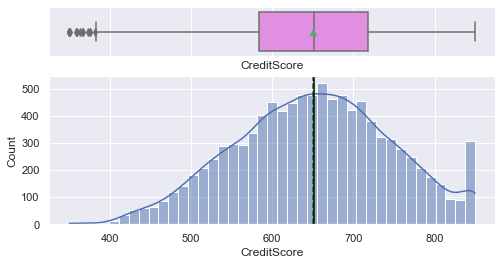

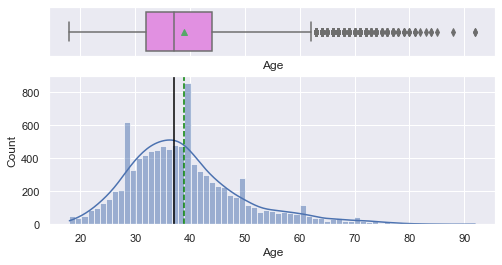

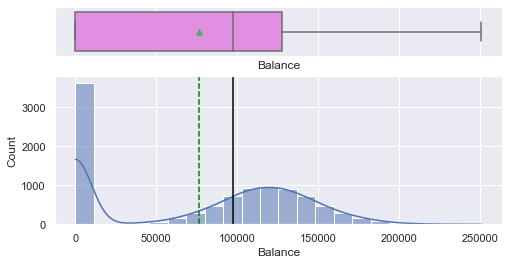

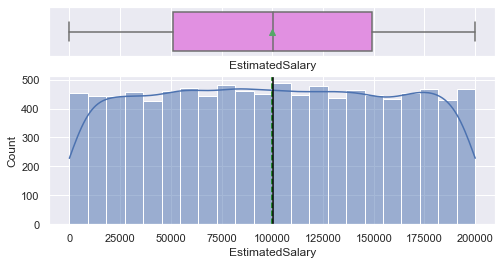

<IPython.core.display.Javascript object>

In [12]:
for item in num_col:
    histogram_boxplot(df, item, kde=True, figsize=(8, 4))

#### Observations:
- `CreditScore` and `EstimatedSalary` are normally distributed with approximately equal mean and median.
- The distribution of `Age` is slightly right-skewed with mean greater than median.
- From the boxplot for `Balance`, we can see that the third quartile(Q3) is equal to 128000 which means 75% of the customers' balance are less than 128 thousand.
- There are outliers in `Age` and `CreditScore`, but those outliers are valuable and the variation (in both Age & Score) is always expected in real-world scenarios.

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

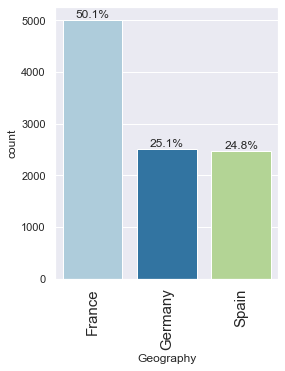

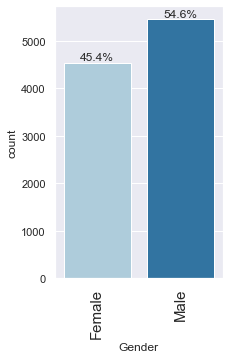

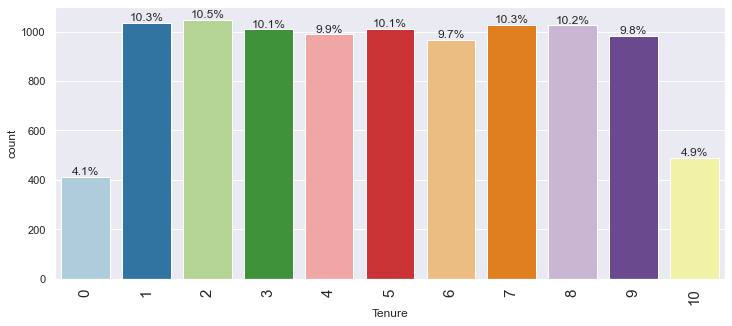

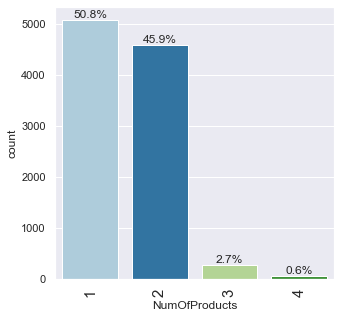

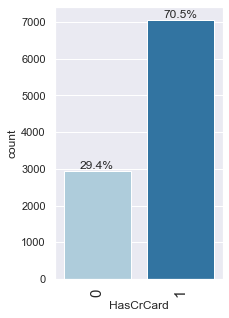

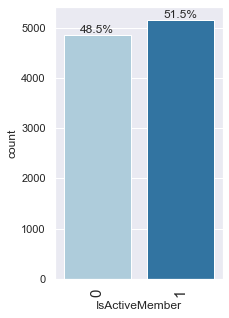

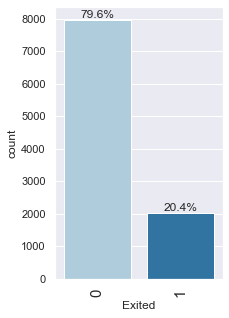

<IPython.core.display.Javascript object>

In [14]:
for item in cat_col:
    labeled_barplot(df, item, perc=True)

#### Observations:
- 50% of the Customers in the dataset are from France.
- 54.6% of the customers are Males.
- only 4% of the custumers have 0 Tenure and 6% have 10, while 10% for each of the values from 1 up to 9.
- 50.8% of the customers have purchased only one product, while 45.9% have purchased 2 products.
- 70.5% of the customers have creditCard
- 51.5% of the customers are active members.
- 20.4% of the customers exited the bank and that is the target variable.

### Bivariate Analysis

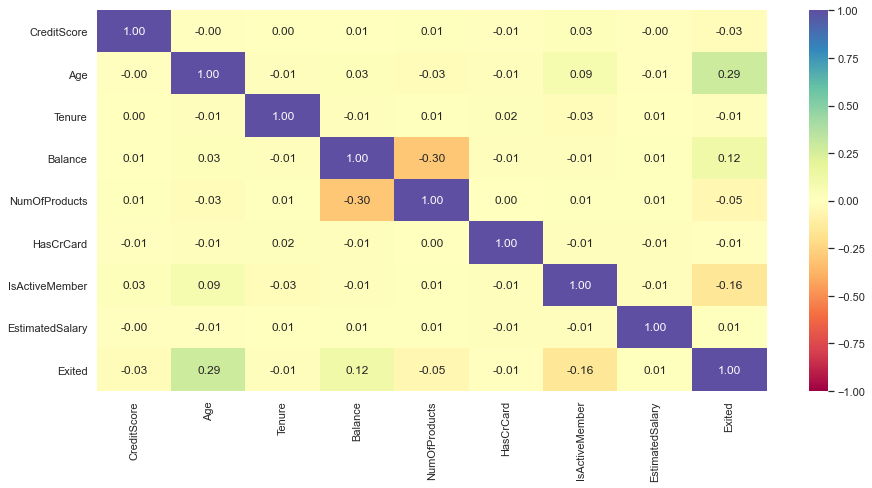

<IPython.core.display.Javascript object>

In [15]:
# checking for correlations
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There are a positive correlation between the Age and leaving the Bank = 0.29
- Exited has 0.12 correlation with Balance and 0.01 with EstimatedSalary.
- The rest of the variables have negative zero correlation with Exited.
- There is a negative correlation between Balance and the Number of products which the customer has purchased through the bank.

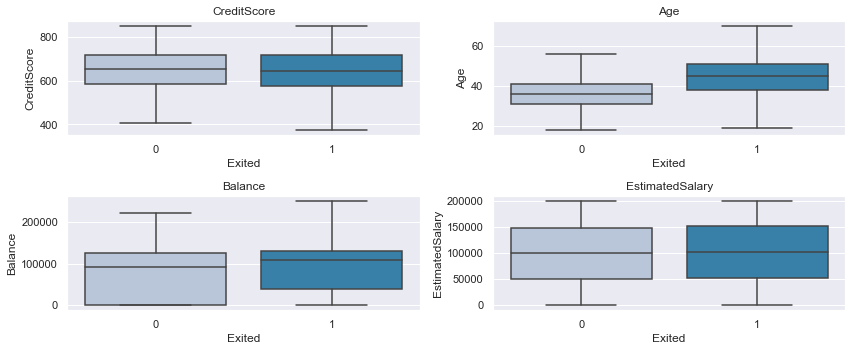

<IPython.core.display.Javascript object>

In [16]:
plt.figure(figsize=(12, 7))

for i, variable in enumerate(num_col):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df["Exited"], df[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

- There are no much difference for the CreditScore and the EstimatedSalary with the possibility of Customer leaving the bank.
- customers who left the bank could have higher Age and Balance.

In [17]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title("Relation between " + predictor + " vs. " + target)
    plt.show()

<IPython.core.display.Javascript object>

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


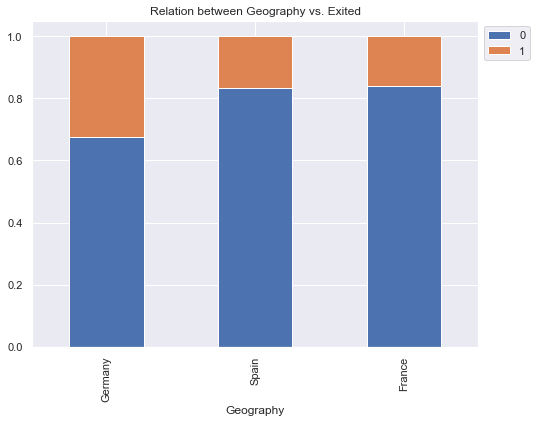

<IPython.core.display.Javascript object>

In [18]:
stacked_barplot(df, "Geography", "Exited")

- 35% of the customers from Germany left the bank and that is the highest percentage per the Geography.
- less than 20% of the customers from Spain and France left the bank.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


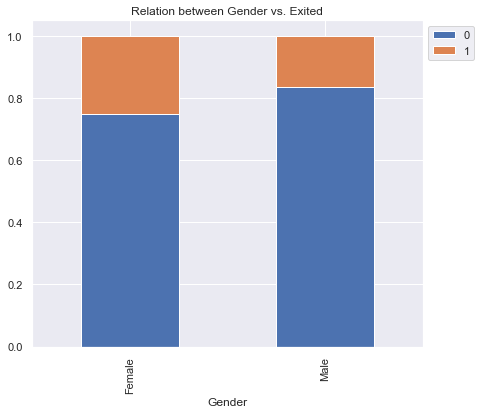

<IPython.core.display.Javascript object>

In [19]:
stacked_barplot(df, "Gender", "Exited")

- Females are higher to leave the bank than Males.

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


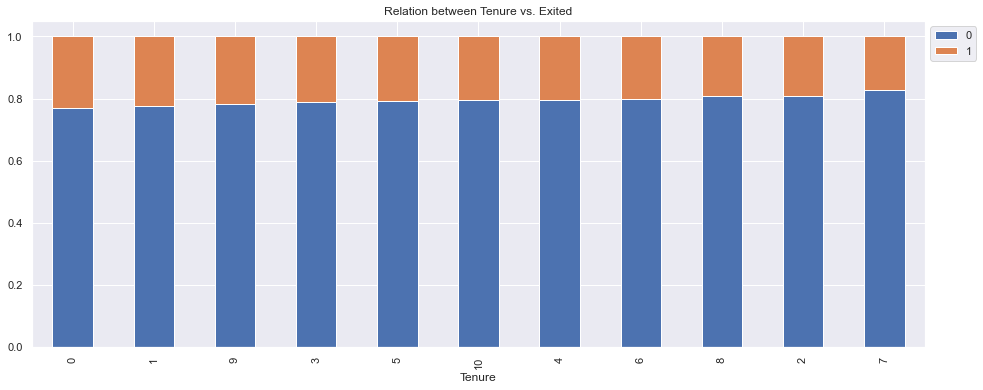

<IPython.core.display.Javascript object>

In [20]:
stacked_barplot(df, "Tenure", "Exited")

- Customers with 0 or 1 `Tenure` (number of years for which they have been with the bank) are the higher to leave the bank.
- 20% of the customers with 10 `Tenure` could leave the bank.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


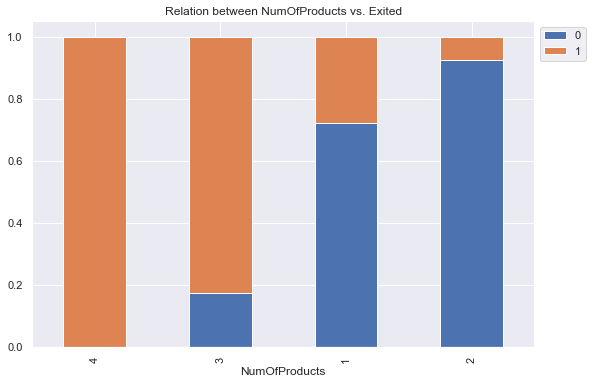

<IPython.core.display.Javascript object>

In [21]:
stacked_barplot(df, "NumOfProducts", "Exited")

- 100% of the customers who purchased 4 products through the bank, left the bank.
- Customers who purchased only two 2 products have the lowest percentage of leaving the bank.
- There are a strong relation between the numbers of the Products and the number of customers who could leave the bank.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


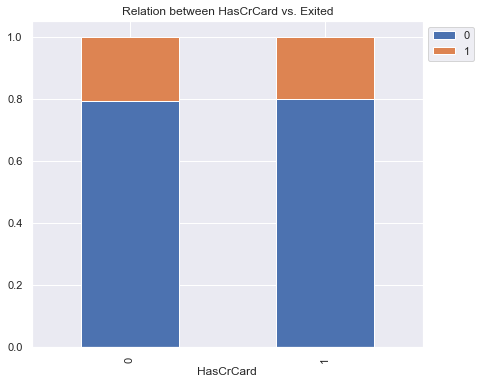

<IPython.core.display.Javascript object>

In [22]:
stacked_barplot(df, "HasCrCard", "Exited")

- Customers who have Credit Card are slightly less to leave the Bank.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


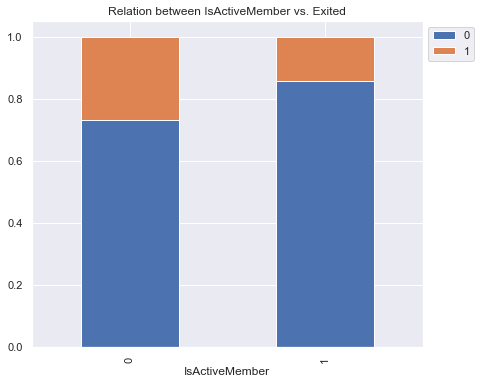

<IPython.core.display.Javascript object>

In [23]:
stacked_barplot(df, "IsActiveMember", "Exited")

- Almost 30% of the customers who are not an active member, left the Bank.
- Customers who are not an active member are more higher to leave the Bank.

## Illustrate the insights based on EDA
- Key meaningful observations

##### Univariate Analysis
- `CreditScore` are normally distributed with approximately equal mean and median 650. There are Outliers at the left.
- `Age` ranges from 18 up to 92 with median at 37. The distribution of `Age` is slightly right-skewed with mean greater than median. There are outliers at the right.
- From the boxplot for `Balance`, we can see that the third quartile(Q3) is equal to 128000 which means 75% of the customers' balance are less than 128 thousand.
- `EstimatedSalary` are normally distributed with approximately equal mean and median 100,000.
- There are outliers in `Age` and `CreditScore`, but those outliers are valuable and the variation (in both Age & Score) is always expected in real-world scenarios.
- France is the Top value from the 3 Unique values of `Geography`. 50% of the Customers in the dataset are from France.
- 54.6% of the customers are `Males`.
- only 4% of the custumers have 0 `Tenure` and 6% have 10, while 10% for each of the values from 1 up to 9.
- `NumOfProducts` are from 1 up to 4. 50.8% of the customers have purchased only one `product`, while 45.9% have purchased 2 products.
- 70.5% of the customers have `creditCard`.
- 51.5% of the customers are `active members`.
- 20.4% of the customers `exited` the bank and that is the target variable.

##### Bivariate Analysis
- There are a positive correlation between the Age and leaving the Bank = 0.29
- Exited has 0.12 correlation with Balance and 0.01 with EstimatedSalary.
- The rest of the variables have negative zero correlation with Exited.
- There is a negative correlation between Balance and the Number of products which the customer has purchased through the bank.
- customers with higher Age and Balance are more possible to leave the bank.
- 35% of the customers from Germany left the bank and that is the highest percentage per the Geography. less than 20% of the customers from Spain and France left the bank.
- Females are higher to leave the bank than Males.
- Customers with 0 or 1 Tenure (number of years for which they have been with the bank) are the higher to leave the bank. 20% of the customers with 10 Tenure could leave the bank
- There are a strong relation between the numbers of the Products and the number of customers who could leave the bank.. 100% of the customers who purchased 4 products through the bank, left the bank. While Customers who purchased only two 2 products have the lowest percentage of leaving the bank.
- Customers who have Credit Card are slightly less to leave the Bank.
- Customers who are not an active member are more higher to leave the Bank. Almost 30% of the customers who are not an active member, left the Bank.

## Data Pre-processing
- Split the target variable and predictors - Split the data into train and test - Rescale the data

In [24]:
# Split the Data
X_data = df.drop(["Exited"], axis=1)
y_data = df["Exited"]  # target variable

<IPython.core.display.Javascript object>

In [25]:
# Creating Dummy variables for the 2 object variables
X_data = pd.get_dummies(X_data, columns=["Geography", "Gender"])
X_data.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
856,567,49,5,134956.02,1,1,0,93953.84,0,1,0,1,0
9050,667,33,9,124573.33,2,0,0,683.37,0,1,0,0,1
6671,677,49,3,0.00,2,1,1,187811.71,1,0,0,1,0
7925,586,33,7,0.00,2,1,1,168261.40,0,0,1,1,0
4741,651,45,2,165901.59,2,1,0,23054.51,1,0,0,0,1
9208,726,44,2,0.00,2,1,1,26733.86,1,0,0,1,0
9246,762,20,1,139432.55,1,1,1,85606.83,1,0,0,0,1
8958,573,52,8,0.00,2,0,1,178229.04,1,0,0,0,1
8987,766,36,5,78381.13,1,0,1,153831.60,0,0,1,0,1
5275,683,42,8,0.00,2,0,1,198134.90,1,0,0,1,0


<IPython.core.display.Javascript object>

In [26]:
X_data.shape

(10000, 13)

<IPython.core.display.Javascript object>

In [27]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=7
)

<IPython.core.display.Javascript object>

In [28]:
# Define the scaler
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

## Deep neural network

- The NN takes a vector of length 13 as input. This represents the information related to each customer, ie each line with 13 columns from the dataset. For each customer, the final layer will output a probability distribution (sigmoid activation function) and classify either as not Exited (0) or Exited (1).

### Creating the Model

In [29]:
# initialize the model
model = Sequential()

<IPython.core.display.Javascript object>

### Adding layers [layers and activations]

In [30]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=8, input_dim=13, activation="relu"))  # input of 13 columns
# hidden layer
model.add(Dense(units=16, activation="relu"))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

### Model compile [optimizers and loss functions]

In [31]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [32]:
# print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

### Training the Model
- Forward pass and Backpropagation

In [33]:
# fitting the model
history = model.fit(X_train, y_train, batch_size=15, epochs=10, validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 1s 2ms/step - loss: 0.5828 - accuracy: 0.7089 - val_loss: 0.4802 - val_accuracy: 0.7894
Epoch 2/10
427/427 [==============================] - 1s 1ms/step - loss: 0.4371 - accuracy: 0.8077 - val_loss: 0.4325 - val_accuracy: 0.8112
Epoch 3/10
427/427 [==============================] - 1s 1ms/step - loss: 0.3997 - accuracy: 0.8269 - val_loss: 0.4018 - val_accuracy: 0.8288
Epoch 4/10
427/427 [==============================] - 1s 1ms/step - loss: 0.3774 - accuracy: 0.8367 - val_loss: 0.3895 - val_accuracy: 0.8344
Epoch 5/10
427/427 [==============================] - 1s 1ms/step - loss: 0.3652 - accuracy: 0.8433 - val_loss: 0.3829 - val_accuracy: 0.8438
Epoch 6/10
427/427 [==============================] - 1s 1ms/step - loss: 0.3580 - accuracy: 0.8448 - val_loss: 0.3748 - val_accuracy: 0.8550
Epoch 7/10
427/427 [==============================] - 1s 1ms/step - loss: 0.3523 - accuracy: 0.8514 - val_loss: 0.3691 - val_accuracy: 0.8506
Epoch 

<IPython.core.display.Javascript object>

- Ploting the Train and Test loss

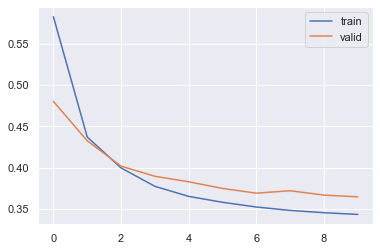

<IPython.core.display.Javascript object>

In [34]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

### Evaluation

In [35]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 984us/step - loss: 0.3591 - accuracy: 0.8550


<IPython.core.display.Javascript object>

In [36]:
def make_confusion_matrix(
    cf,
    group_names=None,
    categories="auto",
    count=True,
    percent=True,
    cbar=True,
    xyticks=True,
    xyplotlabels=True,
    sum_stats=True,
    figsize=None,
    cmap="Blues",
    title=None,
):
    """
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    """

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ["" for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = [
            "{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)
        ]
    else:
        group_percentages = blanks

    box_labels = [
        f"{v1}{v2}{v3}".strip()
        for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)
    ]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score
            )
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        # Get default figure size if not set
        figsize = plt.rcParams.get("figure.figsize")

    if xyticks == False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(
        cf,
        annot=box_labels,
        fmt="",
        cmap=cmap,
        cbar=cbar,
        xticklabels=categories,
        yticklabels=categories,
    )

    if xyplotlabels:
        plt.ylabel("True label")
        plt.xlabel("Predicted label" + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

<IPython.core.display.Javascript object>

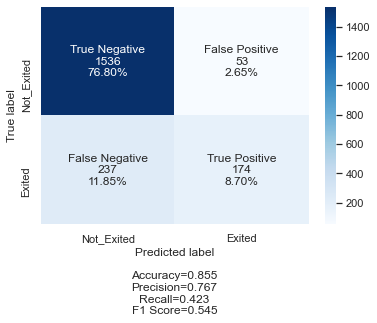

<IPython.core.display.Javascript object>

In [37]:
## Confusion Matrix on unsee test set

y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i] > 0.5:
        y_pred1[i] = 1
    else:
        y_pred1[i] = 0


cm2 = confusion_matrix(y_test, y_pred1)
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]
make_confusion_matrix(cm2, group_names=labels, categories=categories, cmap="Blues")

- Accuracy is 0.855 while Recall is very low with value 0.423
- Precision is 0.767 while F1-Score is 0.545( which is very low).

### Model Performance Improvement
- Comment on which metric is right for model performance evaluation and why? 
- Find the optimal threshold using ROC-AUC curves 
- Comment on model performance 
- Can model performance be improved? check and comment 
- Build another model to implement these improvements 
- Include all the model which were trained to reach at the final one

### Model evaluation criterion
#### Model can make wrong predictions as:
- Predicting a customer is Exited and the customer is not Exited.
- Predicting a customer is not Exited and the customer is Exited.

#### Which case is more important?
- Predicting that customer is not leaving the bank but he leaves. It might enable a loss to the bank

#### How to reduce this loss i.e need to reduce False Negative?
- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the Bank can identify the customers who could leave.

### ROC-AUC
- Find the optimal threshold using ROC-AUC curves

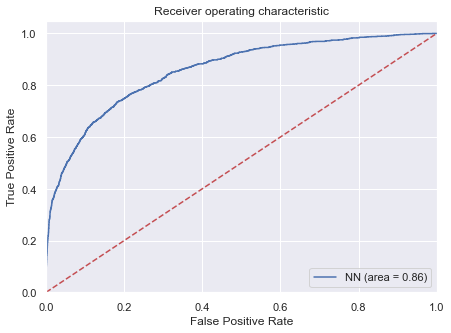

<IPython.core.display.Javascript object>

In [38]:
# ROC-AUC on training set
NN_roc_auc_train = roc_auc_score(y_train, model.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, model.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

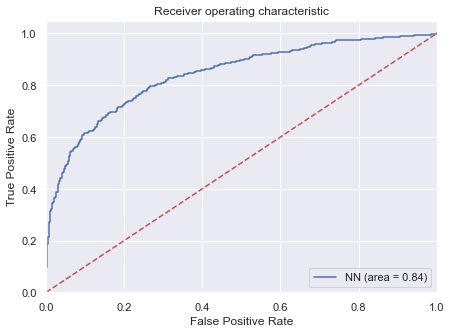

<IPython.core.display.Javascript object>

In [39]:
# ROC-AUC on test set
NN_roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Optimal threshold using AUC-ROC curve

In [40]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, model.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.20968679


<IPython.core.display.Javascript object>

### checking the Model performance on test set using the ROC-AUC threshold

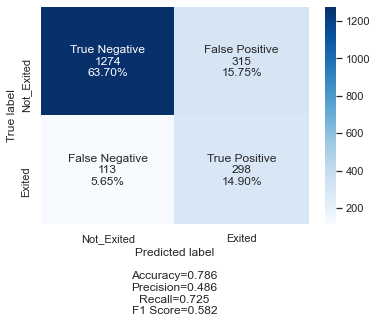

<IPython.core.display.Javascript object>

In [41]:
## Confusion Matrix on unsee test set

y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i] > optimal_threshold_auc_roc:
        y_pred1[i] = 1
    else:
        y_pred1[i] = 0


cm2 = confusion_matrix(y_test, y_pred1)
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]
make_confusion_matrix(cm2, group_names=labels, categories=categories, cmap="Blues")

- Recall increased from 0.423 to 0.725
- F1-Score increased from 0.545 to 0.582 (very small increase).
- Accuracy decreased from 0.855 to 0.786
- Precision decreased from 0.767 to 0.486 

#### There are some basic Hyperparameters which can help to get the better model performance.

### Weight Initialization

In [42]:
model2 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
input_layer = Dense(
    8,
    input_shape=(X_train.shape[1],),
    activation="relu",
    kernel_initializer="he_normal",
)
model2.add(input_layer)  #
# Adding the hidden layer
# Notice that we do not need to specify input dim.
hidden_layer = Dense(16, activation="relu", kernel_initializer="he_normal")
# defining the weight initialiazer
model2.add(hidden_layer)
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
output_layer = Dense(1, activation="relu", kernel_initializer="he_normal")

model2.add(output_layer)

<IPython.core.display.Javascript object>

In [43]:
# Create optimizer with default learning rate
# Compile the model
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [44]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [45]:
history = model2.fit(X_train, y_train, epochs=40, validation_split=0.2, verbose=1)

Epoch 1/40
200/200 [==============================] - 1s 2ms/step - loss: 4.1006 - accuracy: 0.5945 - val_loss: 2.8357 - val_accuracy: 0.7262
Epoch 2/40
200/200 [==============================] - 0s 1ms/step - loss: 2.4825 - accuracy: 0.7708 - val_loss: 2.6881 - val_accuracy: 0.7550
Epoch 3/40
200/200 [==============================] - 0s 1ms/step - loss: 2.3286 - accuracy: 0.7788 - val_loss: 2.4953 - val_accuracy: 0.7575
Epoch 4/40
200/200 [==============================] - 0s 1ms/step - loss: 2.1521 - accuracy: 0.7763 - val_loss: 2.3085 - val_accuracy: 0.7556
Epoch 5/40
200/200 [==============================] - 0s 2ms/step - loss: 2.0153 - accuracy: 0.7763 - val_loss: 2.0884 - val_accuracy: 0.7500
Epoch 6/40
200/200 [==============================] - 0s 1ms/step - loss: 1.9067 - accuracy: 0.7678 - val_loss: 2.0317 - val_accuracy: 0.7550
Epoch 7/40
200/200 [==============================] - 0s 1ms/step - loss: 1.8030 - accuracy: 0.7761 - val_loss: 1.8399 - val_accuracy: 0.7513
Epoch 

<IPython.core.display.Javascript object>

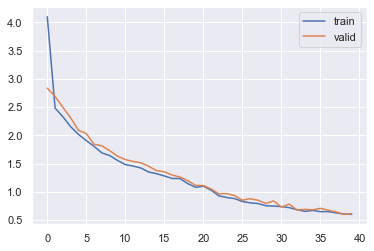

<IPython.core.display.Javascript object>

In [46]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

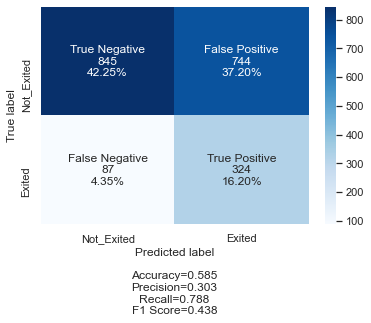

<IPython.core.display.Javascript object>

In [47]:
## Confusion Matrix on unsee test set

y_pred1 = model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i] > optimal_threshold_auc_roc:
        y_pred1[i] = 1
    else:
        y_pred1[i] = 0


cm2 = confusion_matrix(y_test, y_pred1)
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]
make_confusion_matrix(cm2, group_names=labels, categories=categories, cmap="Blues")

- slight increase in the recall with huge decrease in the other metrics.

#### Model 3 - Adding Batch norm layer

In [48]:
model3 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
input_layer = Dense(
    8,
    input_shape=(X_train.shape[1],),
    activation="relu",
    kernel_initializer="he_normal",
)
model3.add(input_layer)  #
# Adding the hidden layer
model3.add(BatchNormalization())  # defining the batchnorm
# Notice that we do not need to specify input dim.
hidden_layer = Dense(16, activation="relu", kernel_initializer="he_normal")
# defining the weight initialiazer
model3.add(hidden_layer)
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
output_layer = Dense(1, activation="relu", kernel_initializer="he_normal")

model3.add(output_layer)

<IPython.core.display.Javascript object>

In [49]:
# Create optimizer with default learning rate
# Compile the model
model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [50]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 112       
_________________________________________________________________
batch_normalization (BatchNo (None, 8)                 32        
_________________________________________________________________
dense_7 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 305
Trainable params: 289
Non-trainable params: 16
_________________________________________________________________


<IPython.core.display.Javascript object>

In [51]:
history = model3.fit(X_train, y_train, epochs=40, validation_split=0.2, verbose=1)

Epoch 1/40
200/200 [==============================] - 1s 2ms/step - loss: 4.3480 - accuracy: 0.6472 - val_loss: 3.7439 - val_accuracy: 0.7000
Epoch 2/40
200/200 [==============================] - 0s 1ms/step - loss: 3.3528 - accuracy: 0.7312 - val_loss: 3.1025 - val_accuracy: 0.7606
Epoch 3/40
200/200 [==============================] - 0s 2ms/step - loss: 2.9036 - accuracy: 0.7763 - val_loss: 2.9855 - val_accuracy: 0.7638
Epoch 4/40
200/200 [==============================] - 0s 2ms/step - loss: 2.9143 - accuracy: 0.7669 - val_loss: 3.0054 - val_accuracy: 0.7669
Epoch 5/40
200/200 [==============================] - 0s 1ms/step - loss: 2.7992 - accuracy: 0.7836 - val_loss: 2.9898 - val_accuracy: 0.7731
Epoch 6/40
200/200 [==============================] - 0s 1ms/step - loss: 2.7670 - accuracy: 0.7870 - val_loss: 2.9684 - val_accuracy: 0.7750
Epoch 7/40
200/200 [==============================] - 0s 2ms/step - loss: 2.7869 - accuracy: 0.7894 - val_loss: 2.9534 - val_accuracy: 0.7788
Epoch 

<IPython.core.display.Javascript object>

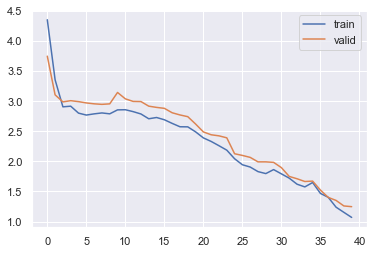

<IPython.core.display.Javascript object>

In [52]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

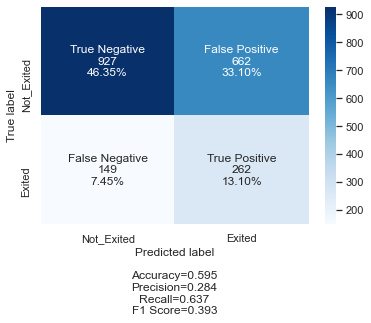

<IPython.core.display.Javascript object>

In [53]:
## Confusion Matrix on unsee test set

y_pred1 = model3.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i] > optimal_threshold_auc_roc:
        y_pred1[i] = 1
    else:
        y_pred1[i] = 0


cm2 = confusion_matrix(y_test, y_pred1)
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]
make_confusion_matrix(cm2, group_names=labels, categories=categories, cmap="Blues")

- The True Negative increased to 46% while the True Positive decreased to 13%.

#### Model 4 -  Weighted loss to account for large class imbalance in train dataset
- apply on Model 1

In [54]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=np.array([y_train.iloc[i] for i in range(len(y_train))]),
)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.627549419516787, 1: 2.4600246002460024}

<IPython.core.display.Javascript object>

In [55]:
model.fit(
    X_train, y_train, batch_size=15, epochs=5, class_weight=class_weights, shuffle=True
)

Epoch 1/5
534/534 [==============================] - 2s 2ms/step - loss: 0.4805 - accuracy: 0.7866
Epoch 2/5
534/534 [==============================] - 1s 2ms/step - loss: 0.4714 - accuracy: 0.7815
Epoch 3/5
534/534 [==============================] - 1s 2ms/step - loss: 0.4682 - accuracy: 0.7801
Epoch 4/5
534/534 [==============================] - 1s 2ms/step - loss: 0.4664 - accuracy: 0.7854
Epoch 5/5
534/534 [==============================] - 1s 2ms/step - loss: 0.4650 - accuracy: 0.7862


<IPython.core.display.Javascript object>

In [56]:
score_weighted = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 791us/step - loss: 0.4700 - accuracy: 0.7735


<IPython.core.display.Javascript object>

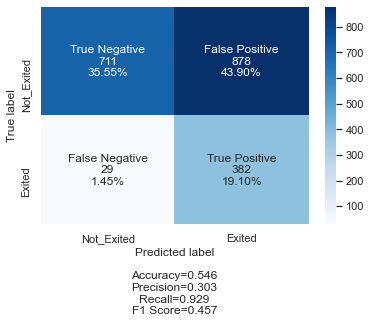

<IPython.core.display.Javascript object>

In [57]:
## Confusion Matrix on unsee test set

y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i] > optimal_threshold_auc_roc:
        y_pred1[i] = 1
    else:
        y_pred1[i] = 0


cm2 = confusion_matrix(y_test, y_pred1)
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]
make_confusion_matrix(cm2, group_names=labels, categories=categories, cmap="Blues")

- Recall is 0.9 while Accuracy is very low.
- the True Negative decreased and the False Positive increased.

 **Conclusion:** 



 As you can see here the Recall is increased but the precision is very bad.  There is still  lot of scope of  improvements  as follows:
 
1) use Precision-Recall curve to find a better threshold

2) Different combination of weight initialization and dropout rate might work 

3) Hyperparameter tuning can be applied to tune the different Hyperparameters



We can select the Model-1 after using the ROC-AUC threshold as our final model based on the above analysis 